# Anime Data Cleaning

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)
print(torch.cuda.device_count())
print(torch.cuda.get_device_name(0))

cuda
1
Tesla T4


In [3]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Deep Learning/Deep Learning Final Project/anime-dataset-2023.csv')
df.head()

,anime_id,Name,English name,Other name,Score,Genres,Synopsis,Type,Episodes,Aired,...,Studios,Source,Duration,Rating,Rank,Popularity,Favorites,Scored By,Members,Image URL
0,1,Cowboy Bebop,Cowboy Bebop,カウボーイビバップ,8.75,"Action, Award Winning, Sci-Fi","Crime is timeless. By the year 2071, humanity ...",TV,26.0,"Apr 3, 1998 to Apr 24, 1999",...,Sunrise,Original,24 min per ep,R - 17+ (violence & profanity),41.0,43,78525,914193.0,1771505,https://cdn.myanimelist.net/images/anime/4/196...
1,5,Cowboy Bebop: Tengoku no Tobira,Cowboy Bebop: The Movie,カウボーイビバップ 天国の扉,8.38,"Action, Sci-Fi","Another day, another bounty—such is the life o...",Movie,1.0,"Sep 1, 2001",...,Bones,Original,1 hr 55 min,R - 17+ (violence & profanity),189.0,602,1448,206248.0,360978,https://cdn.myanimelist.net/images/anime/1439/...
2,6,Trigun,Trigun,トライガン,8.22,"Action, Adventure, Sci-Fi","Vash the Stampede is the man with a $$60,000,0...",TV,26.0,"Apr 1, 1998 to Sep 30, 1998",...,Madhouse,Manga,24 min per ep,PG-13 - Teens 13 or older,328.0,246,15035,356739.0,727252,https://cdn.myanimelist.net/images/anime/7/203...
3,7,Witch Hunter Robin,Witch Hunter Robin,Witch Hunter ROBIN (ウイッチハンターロビン),7.25,"Action, Drama, Mystery, Supernatural",Robin Sena is a powerful craft user drafted in...,TV,26.0,"Jul 3, 2002 to Dec 25, 2002",...,Sunrise,Original,25 min per ep,PG-13 - Teens 13 or older,2764.0,1795,613,42829.0,111931,https://cdn.myanimelist.net/images/anime/10/19...
4,8,Bouken Ou Beet,Beet the Vandel Buster,冒険王ビィト,6.94,"Adventure, Fantasy, Supernatural",It is the dark century and the people are suff...,TV,52.0,"Sep 30, 2004 to Sep 29, 2005",...,Toei Animation,Manga,23 min per ep,PG - Children,4240.0,5126,14,6413.0,15001,https://cdn.myanimelist.net/images/anime/7/215...


In [4]:
# Using smaller sample to finetune model as using the entire dataset takes too much time
#df = df.sample(n=1000, random_state=42).reset_index(drop=True)

In [5]:
selected_columns = ['anime_id', 'Name', 'Genres', 'Image URL']

df = df[selected_columns]

# Dataframe only includes selected_columns
df.head()

,anime_id,Name,Genres,Image URL
0,34784,Kuroko no Basket: Oshaberi Shiyou ka,"Comedy, Sports",https://cdn.myanimelist.net/images/anime/9/839...
1,3464,Kemeko Deluxe!,"Action, Comedy, Romance, Sci-Fi, Ecchi",https://cdn.myanimelist.net/images/anime/3/755...
2,54253,"Sekai, Nishihara Shoukai no Sekai! Part 2 Gyak...",UNKNOWN,https://cdn.myanimelist.net/images/anime/1247/...
3,5997,Sabu to Ichi Torimono Hikae,"Action, Adventure, Drama, Slice of Life",https://cdn.myanimelist.net/images/anime/9/840...
4,6425,Weiß Survive,"Comedy, Ecchi",https://cdn.myanimelist.net/images/anime/10/17...


In [6]:
from sklearn.preprocessing import MultiLabelBinarizer

df['Genres'] = df['Genres'].apply(lambda x: x.split(', '))
mlb = MultiLabelBinarizer()

# One-hot encode the genres
one_hot_genres = mlb.fit_transform(df['Genres'])

# Create a DataFrame from the one-hot encoded genres
anime = pd.DataFrame(one_hot_genres, columns=mlb.classes_)

# Concatenate with the original DataFrame
anime = pd.concat([df, anime], axis=1)

In [7]:
one_hot_genres[0]

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0])

In [8]:
anime.head()

,anime_id,Name,Genres,Image URL,Action,Adventure,Avant Garde,Award Winning,Boys Love,Comedy,...,Hentai,Horror,Mystery,Romance,Sci-Fi,Slice of Life,Sports,Supernatural,Suspense,UNKNOWN
0,34784,Kuroko no Basket: Oshaberi Shiyou ka,"[Comedy, Sports]",https://cdn.myanimelist.net/images/anime/9/839...,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
1,3464,Kemeko Deluxe!,"[Action, Comedy, Romance, Sci-Fi, Ecchi]",https://cdn.myanimelist.net/images/anime/3/755...,1,0,0,0,0,1,...,0,0,0,1,1,0,0,0,0,0
2,54253,"Sekai, Nishihara Shoukai no Sekai! Part 2 Gyak...",[UNKNOWN],https://cdn.myanimelist.net/images/anime/1247/...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,5997,Sabu to Ichi Torimono Hikae,"[Action, Adventure, Drama, Slice of Life]",https://cdn.myanimelist.net/images/anime/9/840...,1,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,6425,Weiß Survive,"[Comedy, Ecchi]",https://cdn.myanimelist.net/images/anime/10/17...,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [9]:
import requests
from PIL import Image
from io import BytesIO
import numpy as np

def preprocess_image(url, target_size=(224, 224)):
    try:
        response = requests.get(url)
        if response.status_code == 200:
            img = Image.open(BytesIO(response.content))
            img = img.resize(target_size)
            # Normalizing pixel values
            img_array = np.array(img) / 255.0
            return img_array
        else:
            # Placeholder for invalid images
            return np.zeros((target_size[0], target_size[1], 3))
    except Exception as e:
        print(f"Error processing image from {url}: {e}")
        return np.zeros((target_size[0], target_size[1], 3))


In [10]:
# Process the images from the URLs
anime['processed_images'] = anime['Image URL'].apply(lambda url: preprocess_image(url))

In [11]:
# Number of invalid images
sum = 0
for idx, image in enumerate(anime['processed_images']):
    if image.shape != anime['processed_images'].iloc[0].shape:
        print(f"Image at index {idx} has a different shape: {image.shape}")
        sum += 1
print(sum)

Image at index 237 has a different shape: (224, 224)
Image at index 483 has a different shape: (224, 224)
Image at index 496 has a different shape: (224, 224)
Image at index 515 has a different shape: (224, 224)
Image at index 541 has a different shape: (224, 224)
Image at index 715 has a different shape: (224, 224)
Image at index 801 has a different shape: (224, 224)
Image at index 854 has a different shape: (224, 224)
Image at index 856 has a different shape: (224, 224)
Image at index 889 has a different shape: (224, 224)
Image at index 931 has a different shape: (224, 224)
Image at index 949 has a different shape: (224, 224)
Image at index 954 has a different shape: (224, 224)
13


In [12]:
desired_shape = (224, 224, 3)
anime = anime[anime['processed_images'].apply(lambda img: img.shape == desired_shape)]

In [13]:
one_hot_genres = mlb.fit_transform(anime['Genres'])

In [14]:
X = np.array(anime['processed_images'].tolist())
y = one_hot_genres

In [15]:
from sklearn.model_selection import train_test_split

train_images, test_images, train_labels, test_labels = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
import numpy as np
from sklearn.model_selection import KFold
import tensorflow.keras.backend as K
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

def hammingloss_with_threshold(threshold):
    def hammingloss(y_true, y_pred):
        y_pred = K.cast(y_pred > threshold, 'float32')
        return K.mean(K.not_equal(y_true, y_pred), axis=-1)
    return hammingloss

# Number of folds
num_folds = 5
kfold = KFold(n_splits=num_folds, shuffle=True)

# Different thresholds for Hamming Loss
thresholds = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

# Storing the best thresholds
best_accuracy_threshold = 0
highest_accuracy = 0
best_hamming_threshold = 0
highest_hamming_loss = 0

# Loop over each threshold
for threshold in thresholds:
    print(f'\nTraining with Hamming Loss Threshold: {threshold}')
    fold_no = 1
    total_accuracy = 0
    total_hamming_loss = 0

    # K-Fold Cross Validation
    for train, test in kfold.split(train_images, train_labels):

        model = Sequential([
            Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
            MaxPooling2D(2, 2),
            Conv2D(64, (3, 3), activation='relu'),
            MaxPooling2D(2, 2),
            Conv2D(128, (3, 3), activation='relu'),
            MaxPooling2D(2, 2),
            Flatten(),
            Dense(128, activation='relu'),
            Dense(len(mlb.classes_), activation='sigmoid')
        ])

        # Compile model
        model.compile(optimizer='adam', loss='binary_crossentropy',
                      metrics=['accuracy', hammingloss_with_threshold(threshold)])

        # Fit the model
        print(f'Training for fold {fold_no}...')
        history = model.fit(train_images[train], train_labels[train],
                            batch_size=32,
                            epochs=10,
                            validation_data=(train_images[test], train_labels[test]))

        # Evaluate the model
        scores = model.evaluate(train_images[test], train_labels[test], verbose=0)
        total_accuracy += scores[1]
        total_hamming_loss += scores[2]

        fold_no += 1

    # Average performance over all folds
    avg_accuracy = total_accuracy / num_folds
    avg_hamming_loss = total_hamming_loss / num_folds

    # Check if this threshold is the best so far
    if avg_accuracy > highest_accuracy:
        highest_accuracy = avg_accuracy
        best_accuracy_threshold = threshold

    if avg_hamming_loss > highest_hamming_loss:
        highest_hamming_loss = avg_hamming_loss
        best_hamming_threshold = threshold

# Print the best thresholds
print(f'Best Threshold for Accuracy: {best_accuracy_threshold} with Accuracy: {highest_accuracy}')
print(f'Best Threshold for Hamming Loss: {best_hamming_threshold} with Hamming Loss: {highest_hamming_loss}')



Training with Hamming Loss Threshold: 0.1
Training for fold 1...
Epoch 1/10
20/20 [==============================] - 5s 191ms/step - loss: 0.2900 - accuracy: 0.1490 - hammingloss: 0.3516 - val_loss: 0.2518 - val_accuracy: 0.2152 - val_hammingloss: 0.3567
Epoch 2/10
20/20 [==============================] - 1s 52ms/step - loss: 0.2373 - accuracy: 0.2456 - hammingloss: 0.2703 - val_loss: 0.2448 - val_accuracy: 0.2468 - val_hammingloss: 0.2356
Epoch 3/10
20/20 [==============================] - 1s 52ms/step - loss: 0.2254 - accuracy: 0.2758 - hammingloss: 0.2383 - val_loss: 0.2486 - val_accuracy: 0.2595 - val_hammingloss: 0.3449
Epoch 4/10
20/20 [==============================] - 1s 52ms/step - loss: 0.2103 - accuracy: 0.3296 - hammingloss: 0.2170 - val_loss: 0.2581 - val_accuracy: 0.2722 - val_hammingloss: 0.1841
Epoch 5/10
20/20 [==============================] - 1s 53ms/step - loss: 0.1746 - accuracy: 0.4279 - hammingloss: 0.1748 - val_loss: 0.2484 - val_accuracy: 0.2722 - val_hammingl

In [16]:
import tensorflow.keras.backend as K
import tensorflow as tf

def hammingloss(y_true, y_pred):
    # Put the threshold of the predictions at 0.6 because this gives the best accuracy from K-Fold cross validation
    # If the prediction of a poster being a certain genre is 0.6, then put 1 as its binary label
    y_pred = K.cast(y_pred > 0.6, 'float32')
    # Compute the Hamming Loss
    return K.mean(K.not_equal(y_true, y_pred), axis=-1)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Define the CNN model with additional layers
model = Sequential([
    # First convolutional layer (input layer)
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(2, 2),

    # Second convolutional layer
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    # Third convolutional layer
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    # Flattening the output from the convolutional layers to feed into the dense layers
    Flatten(),

    # Dense layer
    Dense(128, activation='relu'),

    # Output layer
    Dense(len(mlb.classes_), activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', hammingloss])

history = model.fit(train_images, train_labels, epochs=10, batch_size=32, validation_data=(test_images, test_labels))

Epoch 1/10
25/25 [==============================] - 3s 75ms/step - loss: 0.2891 - accuracy: 0.1724 - hammingloss: 0.0805 - val_loss: 0.2236 - val_accuracy: 0.1919 - val_hammingloss: 0.0730
Epoch 2/10
25/25 [==============================] - 1s 51ms/step - loss: 0.2387 - accuracy: 0.2370 - hammingloss: 0.0792 - val_loss: 0.2242 - val_accuracy: 0.1919 - val_hammingloss: 0.0730
Epoch 3/10
25/25 [==============================] - 1s 51ms/step - loss: 0.2297 - accuracy: 0.2801 - hammingloss: 0.0791 - val_loss: 0.2190 - val_accuracy: 0.2273 - val_hammingloss: 0.0730
Epoch 4/10
25/25 [==============================] - 1s 52ms/step - loss: 0.2108 - accuracy: 0.3498 - hammingloss: 0.0773 - val_loss: 0.2305 - val_accuracy: 0.2172 - val_hammingloss: 0.0746
Epoch 5/10
25/25 [==============================] - 1s 52ms/step - loss: 0.1725 - accuracy: 0.4677 - hammingloss: 0.0660 - val_loss: 0.2929 - val_accuracy: 0.1869 - val_hammingloss: 0.0946
Epoch 6/10
25/25 [==============================] - 1s 

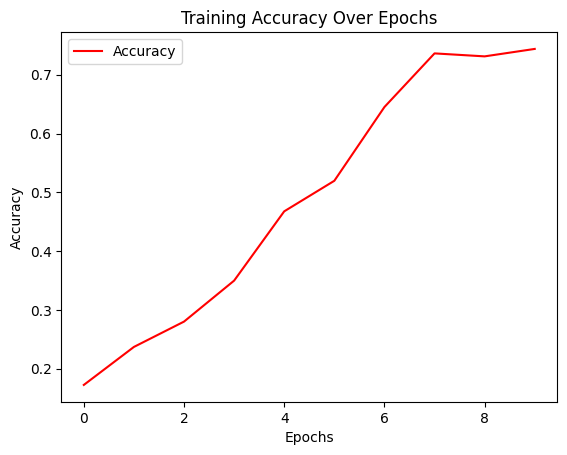

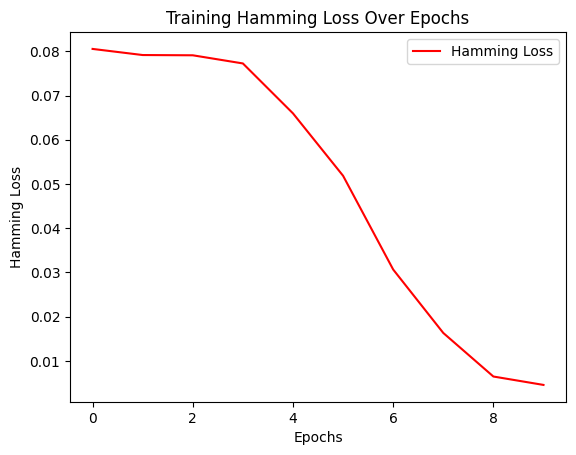

In [ ]:
import matplotlib.pyplot as plt

# Extract accuracy and hamming loss
acc = history.history['accuracy']
loss = history.history['hammingloss']

epochs = range(len(acc))

# Plot training accuracy
plt.plot(epochs, acc, 'r', label='Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training Accuracy Over Epochs')
plt.legend()

plt.figure()

# Plot training hamming loss
plt.plot(epochs, loss, 'r', label='Hamming Loss')
plt.xlabel('Epochs')
plt.ylabel('Hamming Loss')
plt.title('Training Hamming Loss Over Epochs')
plt.legend()

plt.show()

In [ ]:
from sklearn.metrics import hamming_loss

# Predict the labels for the test set
test_predictions = model.predict(test_images)
# Apply threshold from K-fold cross validation
test_predictions_binary = (test_predictions > 0.6).astype(int)

# Calculate Hamming loss of the test set
hamming_loss_value = hamming_loss(test_labels, test_predictions_binary)
print("Hamming Loss on Test Set:", hamming_loss_value)

7/7 [==============================] - 0s 21ms/step
Hamming Loss on Test Set: 0.09205693296602388


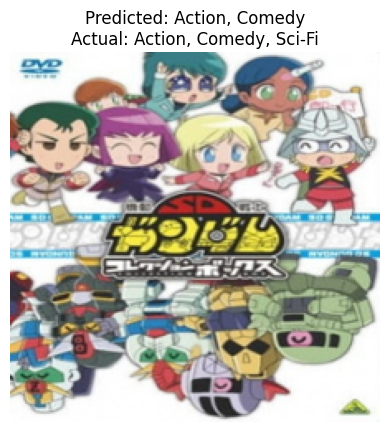

In [ ]:
import matplotlib.pyplot as plt

# Function to convert labels to genre names
def labels_to_genres(labels, mlb):
    return [mlb.classes_[i] for i, label in enumerate(labels) if label == 1]

# Index of image we want to show. Change index to show different image
index = 79
example_image = test_images[index]
actual_labels = test_labels[index]
predicted_labels = test_predictions_binary[index]

# Convert one-hot encoded vectors back to genres
actual_genres = labels_to_genres(actual_labels, mlb)
predicted_genres = labels_to_genres(predicted_labels, mlb)

# Plotting
plt.imshow(example_image)
plt.title(f'Predicted: {", ".join(predicted_genres)}\nActual: {", ".join(actual_genres)}')
plt.axis('off')
plt.show()

Index of Correctly Labeled Anime Poster: 20


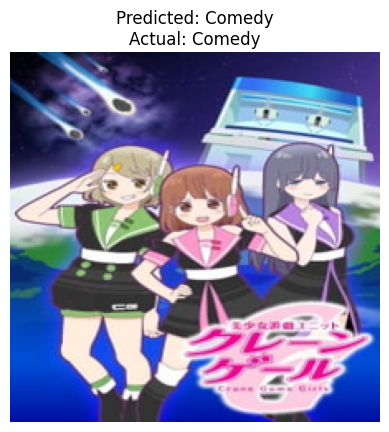

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def labels_to_genres(labels, mlb):
    return [mlb.classes_[i] for i, label in enumerate(labels) if label == 1]

# Loop through the test images and predicted labels
# Shows the first correctly predicted anime poster
for index in range(len(test_images)):
    example_image = test_images[index]
    actual_labels = test_labels[index]
    predicted_labels = test_predictions_binary[index]

    actual_genres = labels_to_genres(actual_labels, mlb)
    predicted_genres = labels_to_genres(predicted_labels, mlb)

    # Check if prediction is correct
    if set(actual_genres) == set(predicted_genres):
        print("Index of Correctly Labeled Anime Poster:", index)
        plt.imshow(example_image)
        plt.title(f'Predicted: {", ".join(predicted_genres)}\nActual: {", ".join(actual_genres)}')
        plt.axis('off')
        plt.show()
        break


In [ ]:
# Count the number of samples where none of the predicted labels are false positives
no_false_positives_count = np.sum(np.all((test_predictions_binary <= test_labels), axis=1))
no_false_positives_accuracy = no_false_positives_count / len(test_labels)

print("Percentage of anime posters without any mislabeled genre:", no_false_positives_accuracy * 100)

Percentage of anime posters without any mislabeled genre: 55.05050505050505


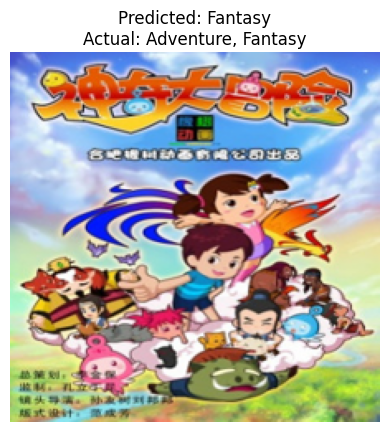

In [ ]:
import matplotlib.pyplot as plt

def labels_to_genres(labels, mlb):
    return [mlb.classes_[i] for i, label in enumerate(labels) if label == 1]

index = 115
example_image = test_images[index]
actual_labels = test_labels[index]
predicted_labels = test_predictions_binary[index]

actual_genres = labels_to_genres(actual_labels, mlb)
predicted_genres = labels_to_genres(predicted_labels, mlb)

plt.imshow(example_image)
plt.title(f'Predicted: {", ".join(predicted_genres)}\nActual: {", ".join(actual_genres)}')
plt.axis('off')
plt.show()

# Semi-Supervised Learning: Self Training

In [22]:
# Splitting the labeled and unlabeled dataset
labeled_data = anime[anime['UNKNOWN'] != 1].reset_index(drop=True)
unlabeled_data = anime[anime['UNKNOWN'] == 1].reset_index(drop=True)

X_labeled = np.array(labeled_data['processed_images'].tolist())
one_hot_genres = mlb.fit_transform(labeled_data['Genres'])
y_labeled = one_hot_genres

train_images, test_images, train_labels, test_labels = train_test_split(X_labeled, y_labeled, test_size=0.2, random_state=42)

In [ ]:
labeled_data.head()

,anime_id,Name,Genres,Image URL,Action,Adventure,Avant Garde,Award Winning,Boys Love,Comedy,...,Horror,Mystery,Romance,Sci-Fi,Slice of Life,Sports,Supernatural,Suspense,UNKNOWN,processed_images
0,34784,Kuroko no Basket: Oshaberi Shiyou ka,"[Comedy, Sports]",https://cdn.myanimelist.net/images/anime/9/839...,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,"[[[0.9764705882352941, 0.9803921568627451, 1.0..."
1,3464,Kemeko Deluxe!,"[Action, Comedy, Romance, Sci-Fi, Ecchi]",https://cdn.myanimelist.net/images/anime/3/755...,1,0,0,0,0,1,...,0,0,1,1,0,0,0,0,0,"[[[1.0, 1.0, 1.0], [1.0, 1.0, 1.0], [1.0, 1.0,..."
2,5997,Sabu to Ichi Torimono Hikae,"[Action, Adventure, Drama, Slice of Life]",https://cdn.myanimelist.net/images/anime/9/840...,1,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,"[[[0.8117647058823529, 0.8352941176470589, 0.8..."
3,6425,Weiß Survive,"[Comedy, Ecchi]",https://cdn.myanimelist.net/images/anime/10/17...,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,"[[[1.0, 1.0, 1.0], [1.0, 1.0, 1.0], [1.0, 1.0,..."
4,34356,Cofun Gal no Coffy (TV) Specials,[Comedy],https://cdn.myanimelist.net/images/anime/5/827...,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,"[[[0.5215686274509804, 0.5215686274509804, 0.5..."


In [ ]:
unlabeled_data.head()

,anime_id,Name,Genres,Image URL,Action,Adventure,Avant Garde,Award Winning,Boys Love,Comedy,...,Horror,Mystery,Romance,Sci-Fi,Slice of Life,Sports,Supernatural,Suspense,UNKNOWN,processed_images
0,54253,"Sekai, Nishihara Shoukai no Sekai! Part 2 Gyak...",[UNKNOWN],https://cdn.myanimelist.net/images/anime/1247/...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,"[[[0.6274509803921569, 0.9137254901960784, 0.9..."
1,29740,Notteke Explet's,[UNKNOWN],https://cdn.myanimelist.net/images/anime/5/715...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,"[[[0.9882352941176471, 0.4392156862745098, 0.5..."
2,34424,How Low Sympathy,[UNKNOWN],https://cdn.myanimelist.net/images/anime/4/829...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,"[[[0.9490196078431372, 0.15294117647058825, 0...."
3,7691,Tokimeki Memorial 4 OVA,[UNKNOWN],https://cdn.myanimelist.net/images/anime/12/21...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,"[[[0.9254901960784314, 0.9058823529411765, 0.9..."
4,42012,Kaze wa Fuiteru ka?,[UNKNOWN],https://cdn.myanimelist.net/images/anime/1416/...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,"[[[0.10196078431372549, 0.19607843137254902, 0..."


In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Model from Base CNN Model
model = Sequential([

    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Flatten(),

    Dense(128, activation='relu'),

    Dense(len(mlb.classes_), activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', hammingloss])
history = model.fit(train_images, train_labels, epochs=10, batch_size=32, validation_data=(test_images, test_labels))

Epoch 1/10
20/20 [==============================] - 3s 78ms/step - loss: 0.3263 - accuracy: 0.1824 - hammingloss: 0.0962 - val_loss: 0.2609 - val_accuracy: 0.2803 - val_hammingloss: 0.0922
Epoch 2/10
20/20 [==============================] - 1s 51ms/step - loss: 0.2517 - accuracy: 0.2912 - hammingloss: 0.0902 - val_loss: 0.2534 - val_accuracy: 0.3121 - val_hammingloss: 0.0922
Epoch 3/10
20/20 [==============================] - 1s 51ms/step - loss: 0.2362 - accuracy: 0.3536 - hammingloss: 0.0881 - val_loss: 0.2580 - val_accuracy: 0.2675 - val_hammingloss: 0.0928
Epoch 4/10
20/20 [==============================] - 1s 52ms/step - loss: 0.2160 - accuracy: 0.4064 - hammingloss: 0.0839 - val_loss: 0.2656 - val_accuracy: 0.2739 - val_hammingloss: 0.0949
Epoch 5/10
20/20 [==============================] - 1s 51ms/step - loss: 0.1735 - accuracy: 0.4960 - hammingloss: 0.0702 - val_loss: 0.3072 - val_accuracy: 0.2739 - val_hammingloss: 0.1010
Epoch 6/10
20/20 [==============================] - 1s 

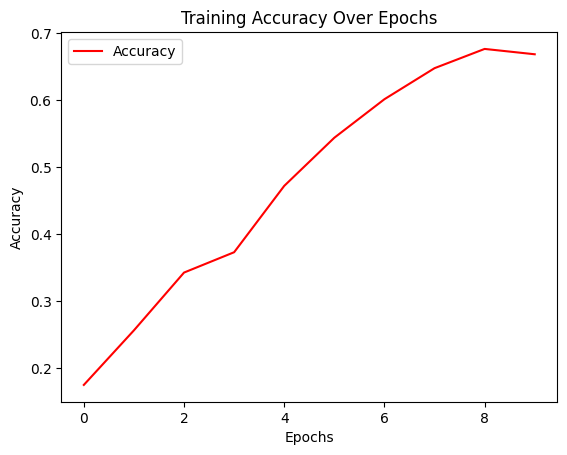

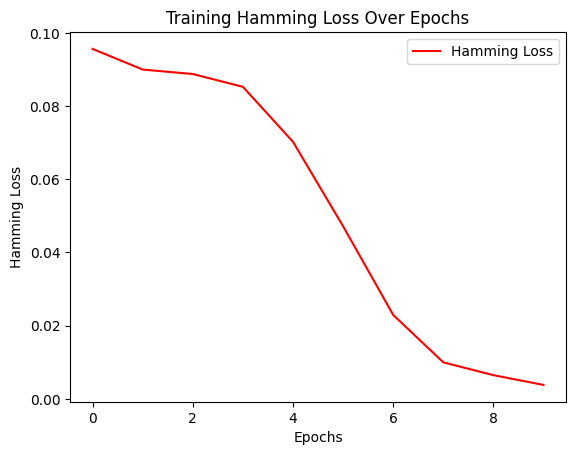

In [19]:
import matplotlib.pyplot as plt

# Extract accuracy and hamming loss
acc = history.history['accuracy']
loss = history.history['hammingloss']

epochs = range(len(acc))

# Plot training accuracy
plt.plot(epochs, acc, 'r', label='Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training Accuracy Over Epochs')
plt.legend()

plt.figure()

# Plot training hamming loss
plt.plot(epochs, loss, 'r', label='Hamming Loss')
plt.xlabel('Epochs')
plt.ylabel('Hamming Loss')
plt.title('Training Hamming Loss Over Epochs')
plt.legend()

plt.show()

In [25]:
for i in range(10):
    # Convert the images from the unlabeled dataset to a numpy array
    X_unlabeled = np.array(unlabeled_data['processed_images'].tolist())

    # Make predictions on the unlabeled data using the trained model
    pseudo_labels = model.predict(X_unlabeled)

    confidence_threshold = 0.6
    # Determine which predictions are confident based on the threshold
    high_confidence_mask = np.any(pseudo_labels > confidence_threshold, axis=1)

    # Select the images and labels for confident predictions
    high_confidence_data = X_unlabeled[high_confidence_mask]
    high_confidence_labels = pseudo_labels[high_confidence_mask]
    high_confidence_labels_binary = (high_confidence_labels > confidence_threshold).astype(int)

    # Update train_images and train_labels to include the new confident predictions
    train_images = np.concatenate((train_images, high_confidence_data))
    train_labels = np.concatenate((train_labels, high_confidence_labels_binary))

    # Retrain the model with the updated training data
    history = model.fit(train_images, train_labels, epochs=10, batch_size=32, validation_data=(test_images, test_labels))

    # Update unlabeled_data by removing the confidently predicted images
    unlabeled_data = unlabeled_data[~high_confidence_mask].reset_index(drop=True)

    # Print statistics
    print("Number of confident predictions added:", len(high_confidence_data))
    print("Remaining unlabeled data size:", len(unlabeled_data))
    print("Updated training data size:", len(train_images))


7/7 [==============================] - 0s 20ms/step
Epoch 1/10
24/24 [==============================] - 2s 96ms/step - loss: 0.0145 - accuracy: 0.7806 - hammingloss: 0.0057 - val_loss: 0.7857 - val_accuracy: 0.2420 - val_hammingloss: 0.1092
Epoch 2/10
24/24 [==============================] - 1s 50ms/step - loss: 0.0124 - accuracy: 0.7833 - hammingloss: 0.0042 - val_loss: 1.0080 - val_accuracy: 0.1720 - val_hammingloss: 0.1137
Epoch 3/10
24/24 [==============================] - 1s 51ms/step - loss: 0.0119 - accuracy: 0.7537 - hammingloss: 0.0046 - val_loss: 1.0069 - val_accuracy: 0.1911 - val_hammingloss: 0.1089
Epoch 4/10
24/24 [==============================] - 1s 51ms/step - loss: 0.0047 - accuracy: 0.7618 - hammingloss: 0.0014 - val_loss: 1.0593 - val_accuracy: 0.2102 - val_hammingloss: 0.1052
Epoch 5/10
24/24 [==============================] - 1s 51ms/step - loss: 0.0063 - accuracy: 0.7470 - hammingloss: 0.0018 - val_loss: 1.1219 - val_accuracy: 0.2229 - val_hammingloss: 0.1001
Epo

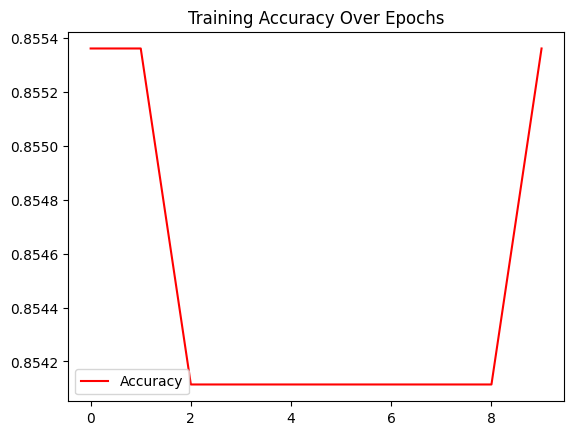

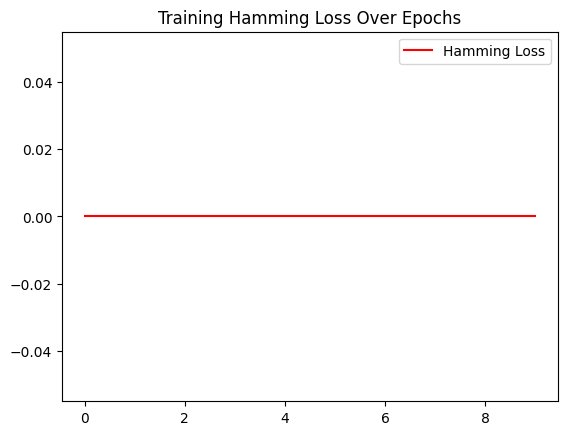

In [29]:
import matplotlib.pyplot as plt

# Extract accuracy and hamming loss
acc = history.history['accuracy']
loss = history.history['hammingloss']

epochs = range(len(acc))

# Plot training accuracy
plt.plot(epochs, acc, 'r', label='Accuracy')
plt.title('Training Accuracy Over Epochs')
plt.legend()

plt.figure()

# Plot training hamming loss
plt.plot(epochs, loss, 'r', label='Hamming Loss')
plt.title('Training Hamming Loss Over Epochs')
plt.legend()

plt.show()

In [28]:
from sklearn.metrics import hamming_loss

# Predict the labels for the test set
test_predictions = model.predict(test_images)
# Apply threshold from K-fold cross validation
test_predictions_binary = (test_predictions > 0.6).astype(int)

# Calculate Hamming loss of the test set
hamming_loss_value = hamming_loss(test_labels, test_predictions_binary)
print("Hamming Loss on Test Set:", hamming_loss_value)

5/5 [==============================] - 0s 21ms/step
Hamming Loss on Test Set: 0.10706703063390961


In [31]:
# Count the number of samples where none of the predicted labels are false positives
no_false_positives_count = np.sum(np.all((test_predictions_binary <= test_labels), axis=1))
no_false_positives_accuracy = no_false_positives_count / len(test_labels)

print("Percentage of anime posters without any mislabeled genre:", no_false_positives_accuracy * 100)

Percentage of anime posters without any mislabeled genre: 50.318471337579616


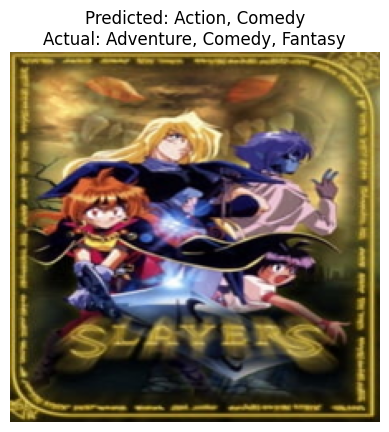

In [45]:
import matplotlib.pyplot as plt

# Function to convert labels to genre names
def labels_to_genres(labels, mlb):
    return [mlb.classes_[i] for i, label in enumerate(labels) if label == 1]

index = 17 # Change this index to view different images
example_image = test_images[index]
actual_labels = test_labels[index]
predicted_labels = test_predictions_binary[index]

# Convert one-hot encoded vectors back to genres
actual_genres = labels_to_genres(actual_labels, mlb)
predicted_genres = labels_to_genres(predicted_labels, mlb)

# Plotting
plt.imshow(example_image)
plt.title(f'Predicted: {", ".join(predicted_genres)}\nActual: {", ".join(actual_genres)}')
plt.axis('off')
plt.show()

In [ ]:
# One round of semi-supervised learning. Only used for debugging.
'''
X_unlabeled = np.array(unlabeled_data['processed_images'].tolist())
# Make predictions on the unlabeled data from the trained model
pseudo_labels = model.predict(X_unlabeled)

confidence_threshold = 0.7
# See which predictions are confident predictions based on the confidence_threshold
# Essentially, any predictions where the probability of an anime poster being a certein genre is above 70% is a confident prediction
high_confidence_mask = np.any(pseudo_labels > confidence_threshold, axis=1)

# This is the images of the anime posters that are confident predictions
high_confidence_data = X_unlabeled[high_confidence_mask]
# Of the confident predictions, this is the probability of each anime being a certain genre
high_confidence_labels = pseudo_labels[high_confidence_mask]

# Convert probabilities to binary labels
high_confidence_labels_binary = (high_confidence_labels > confidence_threshold).astype(int)

combined_train_images = np.concatenate((train_images, high_confidence_data))
combined_train_labels = np.concatenate((train_labels, high_confidence_labels_binary))

model.fit(combined_train_images, combined_train_labels, epochs=10, validation_data=(test_images, test_labels))

# Create a mask for the data to be retained in the unlabeled dataset
retain_mask = ~high_confidence_mask

# Apply this mask to filter the unlabeled data
X_unlabeled = X_unlabeled[retain_mask]

retain_indices = np.where(retain_mask)[1]
unlabeled_data = unlabeled_data.iloc[retain_indices].reset_index(drop=True)
'''

"\nX_unlabeled = np.array(unlabeled_data['processed_images'].tolist())\n# Make predictions on the unlabeled data from the trained model\npseudo_labels = model.predict(X_unlabeled)\n\nconfidence_threshold = 0.7\n# See which predictions are confident predictions based on the confidence_threshold\n# Essentially, any predictions where the probability of an anime poster being a certein genre is above 70% is a confident prediction\nhigh_confidence_mask = np.any(pseudo_labels > confidence_threshold, axis=1)\n\n# This is the images of the anime posters that are confident predictions\nhigh_confidence_data = X_unlabeled[high_confidence_mask]\n# Of the confident predictions, this is the probability of each anime being a certain genre\nhigh_confidence_labels = pseudo_labels[high_confidence_mask]\n\n# Convert probabilities to binary labels\nhigh_confidence_labels_binary = (high_confidence_labels > confidence_threshold).astype(int)\n\ncombined_train_images = np.concatenate((train_images, high_confid

# Milestone 1 Graph

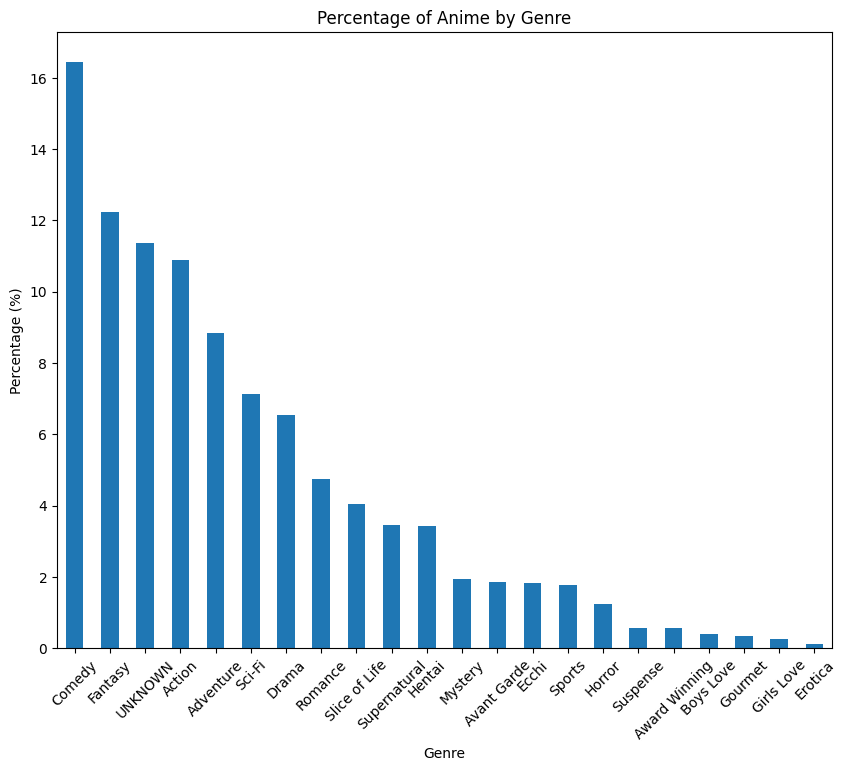

In [ ]:
import matplotlib.pyplot as plt


df['Genres'] = df['Genres'].apply(lambda x: x.split(', '))

all_genres = [genre for sublist in df['Genres'] for genre in sublist]
genre_counts = pd.Series(all_genres).value_counts()

genre_percentages = (genre_counts / genre_counts.sum()) * 100

# Plot the bar graph
plt.figure(figsize=(10, 8))
genre_percentages.plot(kind='bar')
plt.title('Percentage of Anime by Genre')
plt.xlabel('Genre')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=45)
plt.show()